# Decision trees

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#The-problem" data-toc-modified-id="The-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The problem</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Train-test-splitting" data-toc-modified-id="Train-test-splitting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train test splitting</a></span></li><li><span><a href="#Models" data-toc-modified-id="Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Simple-tree-(depth=1)" data-toc-modified-id="Simple-tree-(depth=1)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Simple tree (depth=1)</a></span></li><li><span><a href="#Bigger-tree-(depth=3)" data-toc-modified-id="Bigger-tree-(depth=3)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Bigger tree (depth=3)</a></span></li><li><span><a href="#Huge-tree-(depth=20)" data-toc-modified-id="Huge-tree-(depth=20)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Huge tree (depth=20)</a></span></li><li><span><a href="#Overfitting" data-toc-modified-id="Overfitting-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Overfitting</a></span></li><li><span><a href="#Other-hyperparameters" data-toc-modified-id="Other-hyperparameters-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Other hyperparameters</a></span></li><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Grid search</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature importance</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Intro

Remember Titanic dataset? A decision tree tries to predict Survived Yes/No in the following way:

<img src="https://www.researchgate.net/profile/Joop_Hox/publication/317307818/figure/fig2/AS:633029202571264@1527937331016/Decision-tree-on-Titanic-survival-data-Source-https-en_Q640.jpg" width=300>

Decision trees:
 * are used **both** for regression and classification
 * involve stratifying (segmenting) the predictor space...
 * in an iterative manner
 * are given this name because splitting rules can be summarized in a tree

Decision trees:
 * are simple
 * are useful for interpretation
 * are not very powerful predictors but...
 * give rise to more complex models, like Random Forest or Gradient Boosted Trees algorithms

## The problem

Today we will be using a **white wine** dataset

Experts have rated several wines, whose physical properties are also given

In [5]:
df = pd.read_csv("../datasets/wine_quality.csv")

In [6]:
df.shape

(4898, 12)

In [7]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1132,6.8,0.390,0.31,14.35,0.043,28.0,162.0,0.99880,3.17,0.54,9.1,5
879,6.9,0.120,0.36,2.20,0.037,18.0,111.0,0.99190,3.41,0.82,11.9,8
1147,8.9,0.340,0.32,1.30,0.041,12.0,188.0,0.99530,3.17,0.49,9.5,5
3205,6.8,0.450,0.36,5.00,0.033,28.0,156.0,0.99100,3.11,0.40,12.4,7
4327,6.4,0.240,0.26,8.20,0.054,47.0,182.0,0.99538,3.12,0.50,9.5,5
2578,5.8,0.300,0.27,1.70,0.014,45.0,104.0,0.98914,3.40,0.56,12.6,7
2798,6.9,0.310,0.32,1.60,0.036,34.0,114.0,0.99068,3.19,0.45,11.4,7
2408,7.5,0.705,0.10,13.00,0.044,44.0,214.0,0.99741,3.10,0.50,9.1,5
3349,6.4,0.170,0.27,9.90,0.047,26.0,101.0,0.99596,3.34,0.50,9.9,6
4026,7.6,0.190,0.37,13.10,0.033,52.0,151.0,0.99726,3.18,0.79,10.4,6


We want to:
 * build a **supervised** learning model
 * which is a **regression** model (predict quantitative feature)
 * that tries to predict wine `quality` from its physical properties

We will do train test splitting for correct asessment of model performance

We will use MSE metric: $$MSE=\frac{1}{N}\sum(\hat{y} - y)^2$$

In [8]:
from sklearn.metrics import mean_squared_error

We will:
 * try several models and...
 * keep the one with the **least** MSE on **test set** (also called test error)
 * anyways, we will always show training error too

## Data exploration

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [153]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='count'>

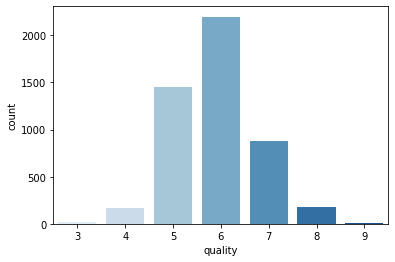

In [10]:
sns.countplot(x=df.quality, palette="Blues")

In [155]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Train test splitting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
target = "quality"

In [13]:
# predictors
X = df.drop(target, axis=1)
# target
y = df[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [15]:
X_train.shape

(3918, 11)

In [16]:
X_test.shape

(980, 11)

In [17]:
y_train.shape

(3918,)

In [18]:
y_test.shape

(980,)

## Models

We will change the maximum depth of a tree to explore different models

### Baseline model

The baseline model is predicting the mean

In [20]:
baseline = y_train.mean()

In [22]:
baseline

5.8894844308320575

MSE can be manually computed

Train error

In [23]:
((y_train - baseline) ** 2).mean()

0.7782406223967026

Test error

In [167]:
((y_test - baseline) ** 2).mean()

0.8086727340637989

### Simple tree (depth=1)

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
model = DecisionTreeRegressor(max_depth=1)

In [27]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

Train error

In [42]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.6511398839609709

Test error

In [43]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.685559553685101

In [44]:
from sklearn.tree import plot_tree

In [46]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


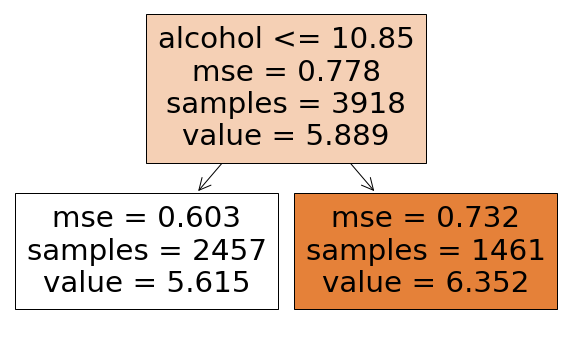

In [45]:
fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

Some important questions for deep understanding:
 * while training, why did the DecisionTree choose `alcohol` and $10.85$ ?
 * what is the meaning of `mse` ?
 * what is the meaning of `value` ?
 

 * while testing (predicting a new instance), how does the tree operate?

### Bigger tree (depth=3)

In [51]:
model = DecisionTreeRegressor(max_depth=3)

In [52]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

Train error

In [53]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.5598058565365571

Test error

In [54]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.5831944046394488

In [56]:
df.iloc[6]

fixed acidity             6.2000
volatile acidity          0.3200
citric acid               0.1600
residual sugar            7.0000
chlorides                 0.0450
free sulfur dioxide      30.0000
total sulfur dioxide    136.0000
density                   0.9949
pH                        3.1800
sulphates                 0.4700
alcohol                   9.6000
quality                   6.0000
Name: 6, dtype: float64

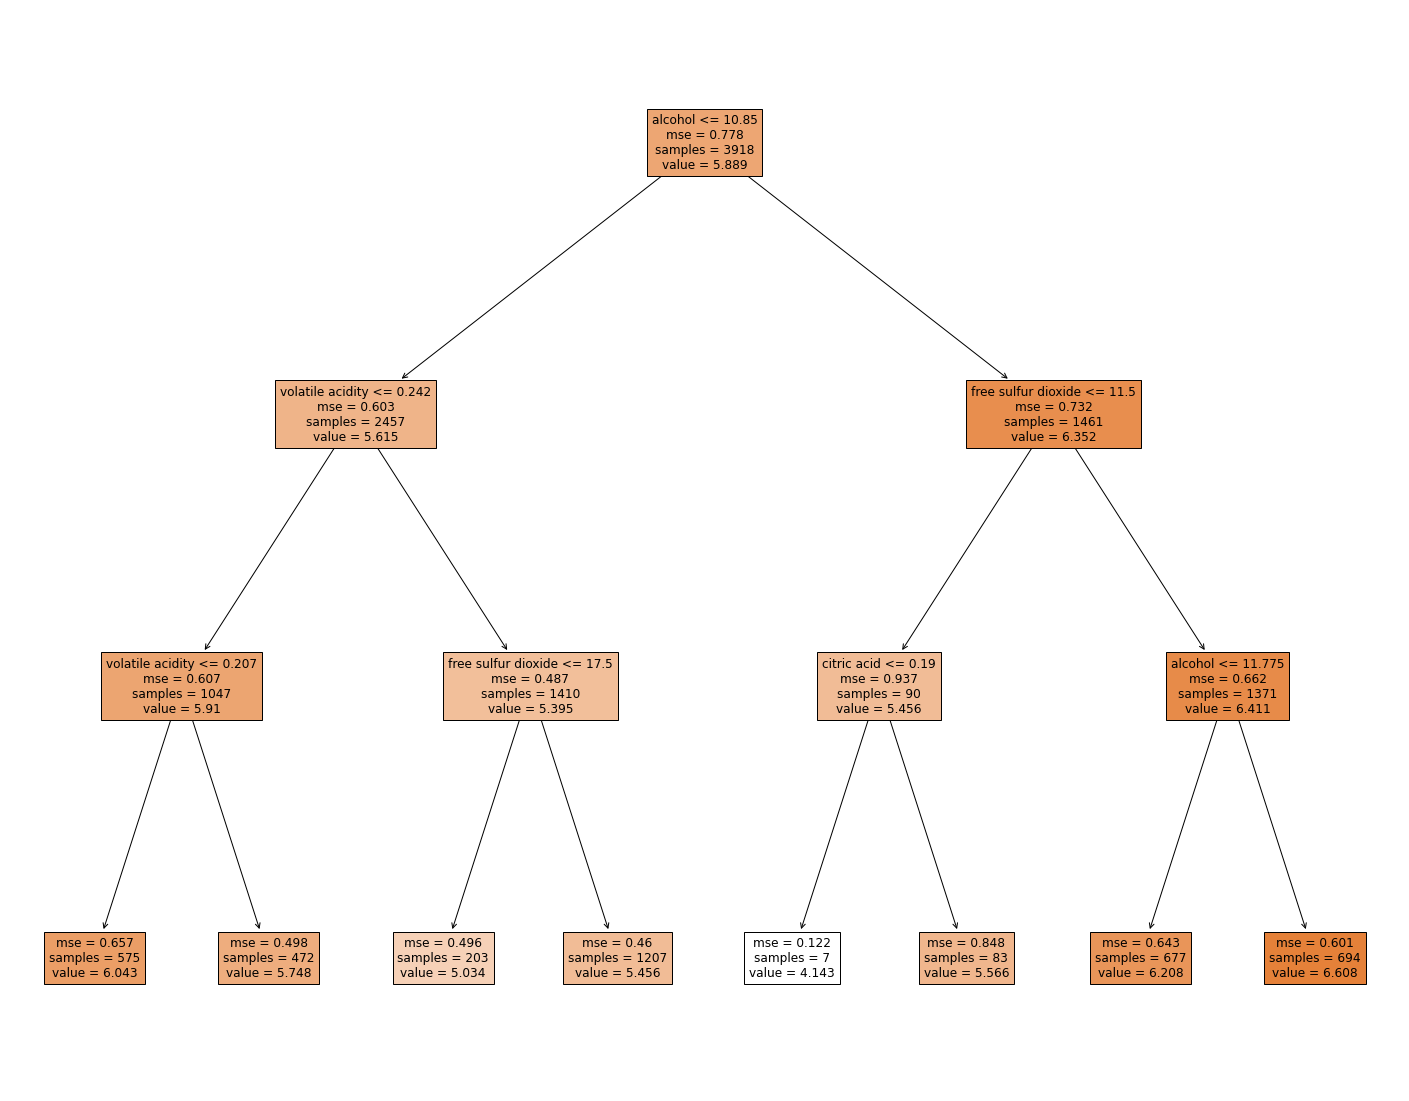

In [55]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

### Huge tree (depth=20)

In [57]:
model = DecisionTreeRegressor(max_depth=20)

In [58]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

Train error

In [59]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.005237513698750157

Test error

In [60]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.7063335027169083

**WHAT HAPPENED??**

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

### Overfitting

Lets see how training and test error changes with `max_depth`

In [62]:
results = []

for depth in range(1, 20):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    result = {
        "depth": depth,
        "train_error": mean_squared_error(y_train, model.predict(X_train)),
        "test_error": mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [63]:
results_df = pd.DataFrame(results)

In [64]:
results_df

,depth,train_error,test_error
0,1,0.651140,0.685560
1,2,0.590774,0.615895
2,3,0.559806,0.583194
3,4,0.526841,0.552649
4,5,0.491170,0.550328
5,6,0.452954,0.564348
6,7,0.413359,0.554860
7,8,0.373803,0.580703
8,9,0.328421,0.590542
9,10,0.277939,0.600465


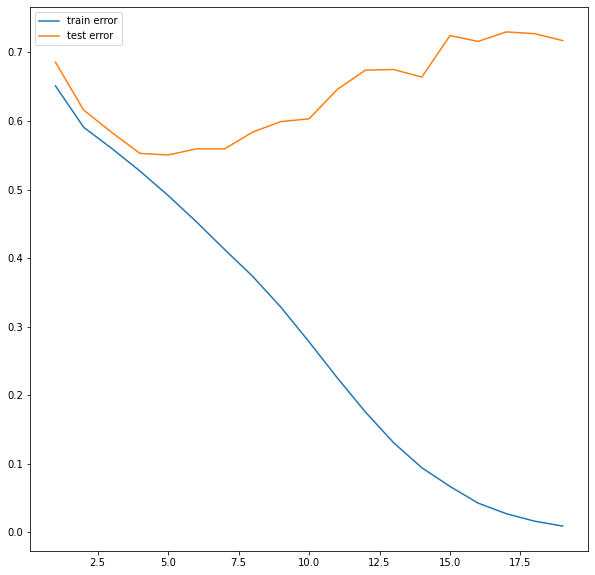

In [257]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

We can see how, when `max_depth` increases above ~6:
 * training error decresases (more precise on training samples)
 * test error increases (model is memorizing training set and not generalizing very well)

This is the famous overfitting! And this is why **test error** is the one you should look at!

### Other hyperparameters

In [65]:
DecisionTreeRegressor??

`min_samples_split`: the minimum number of samples required to split an internal node  

`max_features`: the number of features to consider when looking for the best split  
Why would you not consider all the features to find a Decision Tree?

In [66]:
model = DecisionTreeRegressor(max_depth=5, min_samples_split=100, max_features=8)

In [67]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features=8, min_samples_split=100)

In [68]:
print(f"train error: {mean_squared_error(y_train, model.predict(X_train))}")
print(f"test error: {mean_squared_error(y_test, model.predict(X_test))}")

train error: 0.5080783714486715
test error: 0.5569004700669884


### Grid search

Lets find the **best** combination of hyperparameters, i.e. the ones yielding the least test error

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [2, 4, 6, 8, 10, 12],
        "min_samples_split": [10, 50, 100, 200, 300, 500, 1000],
        "max_features": [5, 7, 9, 11]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [72]:
%%time
gs.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] max_depth=2, max_features=5, min_samples_split=10 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=10, score=(train=-0.628, test=-0.727), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=10 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=10, score=(train=-0.614, test=-0.623), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=10 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=10, score=(train=-0.648, test=-0.695), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=10 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=10, score=(train=-0.630, test=-0.636), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=10 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=10, score=(train=-0.620, test=-0.618), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=2, max_features=5, min_samples_split=50, score=(train=-0.620, test=-0.618), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=50 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=50, score=(train=-0.663, test=-0.698), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=50 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=50, score=(train=-0.597, test=-0.587), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=50 ...............
[CV]  max_depth=2, max_features=5, min_samples_split=50, score=(train=-0.633, test=-0.626), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=100 ..............
[CV]  max_depth=2, max_features=5, min_samples_split=100, score=(train=-0.586, test=-0.612), total=   0.0s
[CV] max_depth=2, max_features=5, min_samples_split=100 ..............
[CV]  max_depth=2, max_features=5, min_samples_split=100, score=(train=-0.658, test=-0.654), total=   0.0s
[CV] ma

[CV]  max_depth=2, max_features=7, min_samples_split=300, score=(train=-0.649, test=-0.605), total=   0.0s
[CV] max_depth=2, max_features=7, min_samples_split=500 ..............
[CV]  max_depth=2, max_features=7, min_samples_split=500, score=(train=-0.613, test=-0.645), total=   0.0s
[CV] max_depth=2, max_features=7, min_samples_split=500 ..............
[CV]  max_depth=2, max_features=7, min_samples_split=500, score=(train=-0.595, test=-0.593), total=   0.0s
[CV] max_depth=2, max_features=7, min_samples_split=500 ..............
[CV]  max_depth=2, max_features=7, min_samples_split=500, score=(train=-0.624, test=-0.669), total=   0.0s
[CV] max_depth=2, max_features=7, min_samples_split=500 ..............
[CV]  max_depth=2, max_features=7, min_samples_split=500, score=(train=-0.619, test=-0.611), total=   0.0s
[CV] max_depth=2, max_features=7, min_samples_split=500 ..............
[CV]  max_depth=2, max_features=7, min_samples_split=500, score=(train=-0.623, test=-0.613), total=   0.0s
[CV

[CV] max_depth=2, max_features=11, min_samples_split=50 ..............
[CV]  max_depth=2, max_features=11, min_samples_split=50, score=(train=-0.586, test=-0.614), total=   0.0s
[CV] max_depth=2, max_features=11, min_samples_split=50 ..............
[CV]  max_depth=2, max_features=11, min_samples_split=50, score=(train=-0.594, test=-0.583), total=   0.0s
[CV] max_depth=2, max_features=11, min_samples_split=50 ..............
[CV]  max_depth=2, max_features=11, min_samples_split=50, score=(train=-0.595, test=-0.579), total=   0.0s
[CV] max_depth=2, max_features=11, min_samples_split=100 .............
[CV]  max_depth=2, max_features=11, min_samples_split=100, score=(train=-0.586, test=-0.612), total=   0.0s
[CV] max_depth=2, max_features=11, min_samples_split=100 .............
[CV]  max_depth=2, max_features=11, min_samples_split=100, score=(train=-0.589, test=-0.597), total=   0.0s
[CV] max_depth=2, max_features=11, min_samples_split=100 .............
[CV]  max_depth=2, max_features=11, m

[CV]  max_depth=4, max_features=5, min_samples_split=200, score=(train=-0.611, test=-0.615), total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_split=300 ..............
[CV]  max_depth=4, max_features=5, min_samples_split=300, score=(train=-0.565, test=-0.640), total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_split=300 ..............
[CV]  max_depth=4, max_features=5, min_samples_split=300, score=(train=-0.570, test=-0.607), total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_split=300 ..............
[CV]  max_depth=4, max_features=5, min_samples_split=300, score=(train=-0.560, test=-0.576), total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_split=300 ..............
[CV]  max_depth=4, max_features=5, min_samples_split=300, score=(train=-0.579, test=-0.604), total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_split=300 ..............
[CV]  max_depth=4, max_features=5, min_samples_split=300, score=(train=-0.546, test=-0.563), total=   0.0s
[CV

[CV]  max_depth=4, max_features=9, min_samples_split=10, score=(train=-0.523, test=-0.569), total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_split=10 ...............
[CV]  max_depth=4, max_features=9, min_samples_split=10, score=(train=-0.525, test=-0.560), total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_split=10 ...............
[CV]  max_depth=4, max_features=9, min_samples_split=10, score=(train=-0.521, test=-0.558), total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_split=10 ...............
[CV]  max_depth=4, max_features=9, min_samples_split=10, score=(train=-0.526, test=-0.580), total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_split=10 ...............
[CV]  max_depth=4, max_features=9, min_samples_split=10, score=(train=-0.548, test=-0.595), total=   0.0s
[CV] max_depth=4, max_features=9, min_samples_split=50 ...............
[CV]  max_depth=4, max_features=9, min_samples_split=50, score=(train=-0.524, test=-0.559), total=   0.0s
[CV] max_

[CV]  max_depth=4, max_features=11, min_samples_split=200, score=(train=-0.537, test=-0.576), total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_split=200 .............
[CV]  max_depth=4, max_features=11, min_samples_split=200, score=(train=-0.528, test=-0.566), total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_split=200 .............
[CV]  max_depth=4, max_features=11, min_samples_split=200, score=(train=-0.526, test=-0.572), total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_split=200 .............
[CV]  max_depth=4, max_features=11, min_samples_split=200, score=(train=-0.543, test=-0.559), total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_split=300 .............
[CV]  max_depth=4, max_features=11, min_samples_split=300, score=(train=-0.532, test=-0.553), total=   0.0s
[CV] max_depth=4, max_features=11, min_samples_split=300 .............
[CV]  max_depth=4, max_features=11, min_samples_split=300, score=(train=-0.537, test=-0.576), total=   0.

[CV]  max_depth=6, max_features=5, min_samples_split=1000, score=(train=-0.593, test=-0.571), total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=6, max_features=7, min_samples_split=10, score=(train=-0.473, test=-0.568), total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=6, max_features=7, min_samples_split=10, score=(train=-0.467, test=-0.544), total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=6, max_features=7, min_samples_split=10, score=(train=-0.448, test=-0.570), total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=6, max_features=7, min_samples_split=10, score=(train=-0.474, test=-0.570), total=   0.0s
[CV] max_depth=6, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=6, max_features=7, min_samples_split=10, score=(train=-0.465, test=-0.554), total=   0.0s
[CV] ma

[CV]  max_depth=6, max_features=9, min_samples_split=100, score=(train=-0.492, test=-0.543), total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_split=100 ..............
[CV]  max_depth=6, max_features=9, min_samples_split=100, score=(train=-0.506, test=-0.569), total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_split=100 ..............
[CV]  max_depth=6, max_features=9, min_samples_split=100, score=(train=-0.502, test=-0.537), total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=6, max_features=9, min_samples_split=200, score=(train=-0.506, test=-0.549), total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=6, max_features=9, min_samples_split=200, score=(train=-0.502, test=-0.537), total=   0.0s
[CV] max_depth=6, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=6, max_features=9, min_samples_split=200, score=(train=-0.495, test=-0.588), total=   0.0s
[CV

[CV]  max_depth=6, max_features=11, min_samples_split=300, score=(train=-0.519, test=-0.543), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=500 .............
[CV]  max_depth=6, max_features=11, min_samples_split=500, score=(train=-0.532, test=-0.564), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=500 .............
[CV]  max_depth=6, max_features=11, min_samples_split=500, score=(train=-0.519, test=-0.576), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=500 .............
[CV]  max_depth=6, max_features=11, min_samples_split=500, score=(train=-0.538, test=-0.555), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=500 .............
[CV]  max_depth=6, max_features=11, min_samples_split=500, score=(train=-0.527, test=-0.566), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=500 .............
[CV]  max_depth=6, max_features=11, min_samples_split=500, score=(train=-0.534, test=-0.541), total=   0.

[CV]  max_depth=8, max_features=7, min_samples_split=10, score=(train=-0.371, test=-0.588), total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=8, max_features=7, min_samples_split=10, score=(train=-0.378, test=-0.585), total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=8, max_features=7, min_samples_split=10, score=(train=-0.363, test=-0.650), total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=8, max_features=7, min_samples_split=10, score=(train=-0.363, test=-0.583), total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_split=10 ...............
[CV]  max_depth=8, max_features=7, min_samples_split=10, score=(train=-0.390, test=-0.554), total=   0.0s
[CV] max_depth=8, max_features=7, min_samples_split=50 ...............
[CV]  max_depth=8, max_features=7, min_samples_split=50, score=(train=-0.409, test=-0.582), total=   0.0s
[CV] max_

[CV]  max_depth=8, max_features=9, min_samples_split=200, score=(train=-0.478, test=-0.587), total=   0.1s
[CV] max_depth=8, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=8, max_features=9, min_samples_split=200, score=(train=-0.487, test=-0.560), total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=8, max_features=9, min_samples_split=200, score=(train=-0.469, test=-0.588), total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_split=200 ..............
[CV]  max_depth=8, max_features=9, min_samples_split=200, score=(train=-0.486, test=-0.530), total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_split=300 ..............
[CV]  max_depth=8, max_features=9, min_samples_split=300, score=(train=-0.493, test=-0.550), total=   0.0s
[CV] max_depth=8, max_features=9, min_samples_split=300 ..............
[CV]  max_depth=8, max_features=9, min_samples_split=300, score=(train=-0.500, test=-0.558), total=   0.0s
[CV

[CV]  max_depth=8, max_features=11, min_samples_split=500, score=(train=-0.538, test=-0.555), total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_split=500 .............
[CV]  max_depth=8, max_features=11, min_samples_split=500, score=(train=-0.526, test=-0.570), total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_split=500 .............
[CV]  max_depth=8, max_features=11, min_samples_split=500, score=(train=-0.530, test=-0.543), total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_split=1000 ............
[CV]  max_depth=8, max_features=11, min_samples_split=1000, score=(train=-0.564, test=-0.589), total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_split=1000 ............
[CV]  max_depth=8, max_features=11, min_samples_split=1000, score=(train=-0.566, test=-0.587), total=   0.0s
[CV] max_depth=8, max_features=11, min_samples_split=1000 ............
[CV]  max_depth=8, max_features=11, min_samples_split=1000, score=(train=-0.568, test=-0.587), total=  

[CV]  max_depth=10, max_features=7, min_samples_split=10, score=(train=-0.280, test=-0.631), total=   0.0s
[CV] max_depth=10, max_features=7, min_samples_split=10 ..............
[CV]  max_depth=10, max_features=7, min_samples_split=10, score=(train=-0.281, test=-0.616), total=   0.0s
[CV] max_depth=10, max_features=7, min_samples_split=50 ..............
[CV]  max_depth=10, max_features=7, min_samples_split=50, score=(train=-0.374, test=-0.595), total=   0.0s
[CV] max_depth=10, max_features=7, min_samples_split=50 ..............
[CV]  max_depth=10, max_features=7, min_samples_split=50, score=(train=-0.395, test=-0.555), total=   0.0s
[CV] max_depth=10, max_features=7, min_samples_split=50 ..............
[CV]  max_depth=10, max_features=7, min_samples_split=50, score=(train=-0.390, test=-0.596), total=   0.0s
[CV] max_depth=10, max_features=7, min_samples_split=50 ..............
[CV]  max_depth=10, max_features=7, min_samples_split=50, score=(train=-0.374, test=-0.591), total=   0.0s
[CV

[CV]  max_depth=10, max_features=9, min_samples_split=100, score=(train=-0.446, test=-0.540), total=   0.1s
[CV] max_depth=10, max_features=9, min_samples_split=200 .............
[CV]  max_depth=10, max_features=9, min_samples_split=200, score=(train=-0.468, test=-0.535), total=   0.1s
[CV] max_depth=10, max_features=9, min_samples_split=200 .............
[CV]  max_depth=10, max_features=9, min_samples_split=200, score=(train=-0.470, test=-0.547), total=   0.1s
[CV] max_depth=10, max_features=9, min_samples_split=200 .............
[CV]  max_depth=10, max_features=9, min_samples_split=200, score=(train=-0.479, test=-0.595), total=   0.1s
[CV] max_depth=10, max_features=9, min_samples_split=200 .............
[CV]  max_depth=10, max_features=9, min_samples_split=200, score=(train=-0.466, test=-0.548), total=   0.0s
[CV] max_depth=10, max_features=9, min_samples_split=200 .............
[CV]  max_depth=10, max_features=9, min_samples_split=200, score=(train=-0.479, test=-0.535), total=   0.

[CV]  max_depth=10, max_features=11, min_samples_split=500, score=(train=-0.538, test=-0.555), total=   0.0s
[CV] max_depth=10, max_features=11, min_samples_split=500 ............
[CV]  max_depth=10, max_features=11, min_samples_split=500, score=(train=-0.526, test=-0.570), total=   0.0s
[CV] max_depth=10, max_features=11, min_samples_split=500 ............
[CV]  max_depth=10, max_features=11, min_samples_split=500, score=(train=-0.530, test=-0.543), total=   0.0s
[CV] max_depth=10, max_features=11, min_samples_split=1000 ...........
[CV]  max_depth=10, max_features=11, min_samples_split=1000, score=(train=-0.564, test=-0.589), total=   0.0s
[CV] max_depth=10, max_features=11, min_samples_split=1000 ...........
[CV]  max_depth=10, max_features=11, min_samples_split=1000, score=(train=-0.566, test=-0.587), total=   0.0s
[CV] max_depth=10, max_features=11, min_samples_split=1000 ...........
[CV]  max_depth=10, max_features=11, min_samples_split=1000, score=(train=-0.568, test=-0.587), to

[CV]  max_depth=12, max_features=7, min_samples_split=10, score=(train=-0.201, test=-0.653), total=   0.0s
[CV] max_depth=12, max_features=7, min_samples_split=10 ..............
[CV]  max_depth=12, max_features=7, min_samples_split=10, score=(train=-0.244, test=-0.626), total=   0.0s
[CV] max_depth=12, max_features=7, min_samples_split=50 ..............
[CV]  max_depth=12, max_features=7, min_samples_split=50, score=(train=-0.366, test=-0.590), total=   0.0s
[CV] max_depth=12, max_features=7, min_samples_split=50 ..............
[CV]  max_depth=12, max_features=7, min_samples_split=50, score=(train=-0.364, test=-0.539), total=   0.0s
[CV] max_depth=12, max_features=7, min_samples_split=50 ..............
[CV]  max_depth=12, max_features=7, min_samples_split=50, score=(train=-0.359, test=-0.592), total=   0.0s
[CV] max_depth=12, max_features=7, min_samples_split=50 ..............
[CV]  max_depth=12, max_features=7, min_samples_split=50, score=(train=-0.373, test=-0.584), total=   0.0s
[CV

[CV]  max_depth=12, max_features=9, min_samples_split=100, score=(train=-0.437, test=-0.542), total=   0.0s
[CV] max_depth=12, max_features=9, min_samples_split=200 .............
[CV]  max_depth=12, max_features=9, min_samples_split=200, score=(train=-0.469, test=-0.547), total=   0.0s
[CV] max_depth=12, max_features=9, min_samples_split=200 .............
[CV]  max_depth=12, max_features=9, min_samples_split=200, score=(train=-0.471, test=-0.540), total=   0.0s
[CV] max_depth=12, max_features=9, min_samples_split=200 .............
[CV]  max_depth=12, max_features=9, min_samples_split=200, score=(train=-0.479, test=-0.565), total=   0.0s
[CV] max_depth=12, max_features=9, min_samples_split=200 .............
[CV]  max_depth=12, max_features=9, min_samples_split=200, score=(train=-0.465, test=-0.563), total=   0.0s
[CV] max_depth=12, max_features=9, min_samples_split=200 .............
[CV]  max_depth=12, max_features=9, min_samples_split=200, score=(train=-0.471, test=-0.534), total=   0.

[CV]  max_depth=12, max_features=11, min_samples_split=500, score=(train=-0.530, test=-0.543), total=   0.0s
[CV] max_depth=12, max_features=11, min_samples_split=1000 ...........
[CV]  max_depth=12, max_features=11, min_samples_split=1000, score=(train=-0.564, test=-0.589), total=   0.0s
[CV] max_depth=12, max_features=11, min_samples_split=1000 ...........
[CV]  max_depth=12, max_features=11, min_samples_split=1000, score=(train=-0.566, test=-0.587), total=   0.0s
[CV] max_depth=12, max_features=11, min_samples_split=1000 ...........
[CV]  max_depth=12, max_features=11, min_samples_split=1000, score=(train=-0.568, test=-0.587), total=   0.0s
[CV] max_depth=12, max_features=11, min_samples_split=1000 ...........
[CV]  max_depth=12, max_features=11, min_samples_split=1000, score=(train=-0.569, test=-0.568), total=   0.0s
[CV] max_depth=12, max_features=11, min_samples_split=1000 ...........
[CV]  max_depth=12, max_features=11, min_samples_split=1000, score=(train=-0.573, test=-0.564), 

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   30.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': [5, 7, 9, 11],
                         'min_samples_split': [10, 50, 100, 200, 300, 500,
                                               1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [74]:
grid_search_results = pd.DataFrame(gs.cv_results_)

In [75]:
grid_search_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [76]:
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [77]:
grid_search_results.sort_values("mean_test_score")

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score
154,12,9,10,-0.664632,-0.209351
6,2,5,1000,-0.664357,-0.649114
140,12,5,10,-0.659679,-0.224434
0,2,5,10,-0.659445,-0.627876
2,2,5,100,-0.655436,-0.633121
...,...,...,...,...,...
106,8,11,50,-0.550081,-0.418537
157,12,9,200,-0.549762,-0.471151
64,6,7,50,-0.549679,-0.480269
102,8,9,300,-0.548419,-0.499694


In [78]:
mean_squared_error(gs.best_estimator_.predict(X_test), y_test)

0.5438827787576582

In [320]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=6, max_features=11, min_samples_split=50)

## Feature importance

In [80]:
pd.Series(gs.best_estimator_.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)

alcohol                 0.527468
volatile acidity        0.181691
free sulfur dioxide     0.135059
residual sugar          0.039271
density                 0.034651
pH                      0.024492
total sulfur dioxide    0.022119
fixed acidity           0.020959
citric acid             0.011027
sulphates               0.003265
chlorides               0.000000
dtype: float64

<AxesSubplot:>

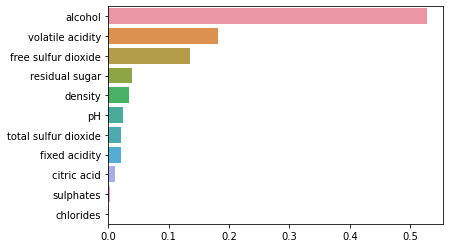

In [81]:
sns.barplot(x=_.values, y=_.index)

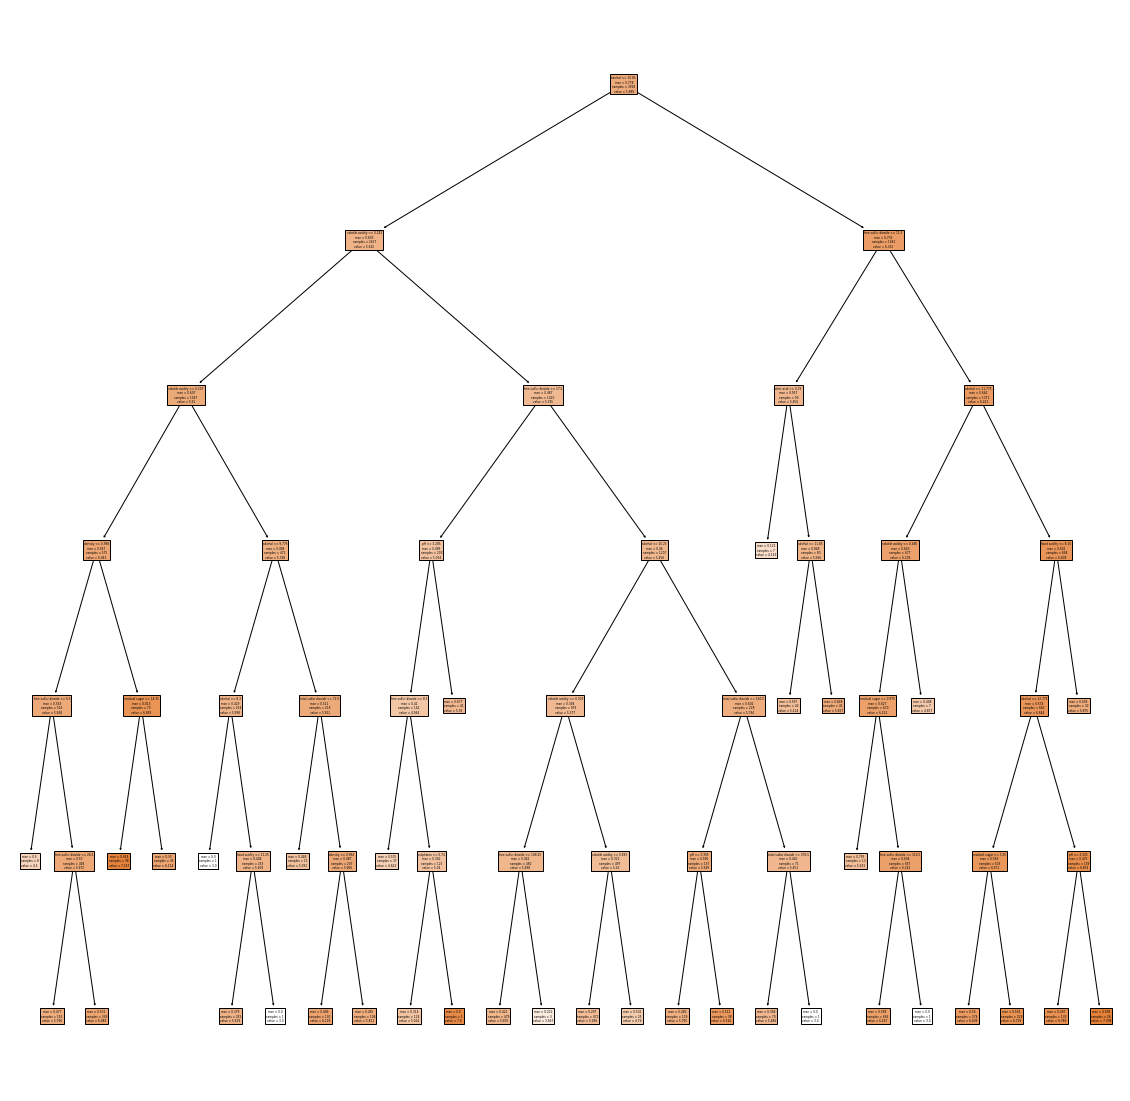

In [82]:
fig = plt.figure(figsize=(20, 20))
plot_tree(gs.best_estimator_, feature_names=df.columns[:-1], filled=True);

In [83]:
fig.savefig("decision_tree.svg", facecolor="white")

## Summary

 * Decision trees are useful for regression (`DecisionTreeRegressor`)and classification (`DecisionTreeClassifier`)
 * Their behavior is quite intuitive
 * Their behavior is interpretable and explainable

 * Decision trees overfit when `max_depth` becomes very big (obvious, individual leaves at the end)
 * Prevent overfitting (always, not only in tree based methods) by looking at test error

 * One decision tree is often not a very powerful ML algorithm
 * Decision trees are the building blocks of more advanced and superpowerful algorithms